# Deep Learning Analysis and Implementation

This comprehensive notebook demonstrates the complete pipeline for analyzing and implementing deep learning solutions for healthcare data analysis.

## 🎯 Project Overview
We'll build a **neural network classifier** to predict diabetes risk using the **Pima Indians Diabetes Dataset**. This project showcases:
- Data analysis and preprocessing techniques
- Neural network architecture design
- Model training and validation
- Performance evaluation and visualization

## 🏥 Dataset Information
**Pima Indians Diabetes Dataset**:
- **Source**: Originally from the National Institute of Diabetes and Digestive and Kidney Diseases
- **Objective**: Predict whether a patient has diabetes based on diagnostic measurements
- **Population**: Pima Indian women aged 21+ years
- **Features**: 8 medical predictor variables
- **Target**: Binary classification (Diabetes: Yes/No)

## 📊 Features Description
| Feature | Description | Range |
|---------|-------------|-------|
| **Pregnancies** | Number of times pregnant | 0-17 |
| **Glucose** | Plasma glucose concentration (mg/dL) | 0-199 |
| **BloodPressure** | Diastolic blood pressure (mm Hg) | 0-122 |
| **SkinThickness** | Triceps skin fold thickness (mm) | 0-99 |
| **Insulin** | 2-Hour serum insulin (μU/mL) | 0-846 |
| **BMI** | Body mass index (kg/m²) | 0-67.1 |
| **DiabetesPedigreeFunction** | Genetic diabetes risk score | 0.078-2.42 |
| **Age** | Age in years | 21-81 |

## 🔬 Methodology
1. **Data Loading & Exploration** - Understanding the dataset structure
2. **Data Preprocessing** - Scaling and preparation for neural networks
3. **Model Architecture** - Designing an appropriate deep learning model
4. **Training & Validation** - Optimizing model performance
5. **Evaluation & Analysis** - Assessing model effectiveness

In [1]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 📥 Step 1: Data Loading and Initial Exploration

### Loading the Pima Indians Diabetes Dataset
We'll start by loading our healthcare dataset directly from the UCI Machine Learning Repository. This dataset is widely used for binary classification tasks in medical machine learning applications.

**Why this dataset?**
- Real-world medical data with clinical relevance
- Balanced mix of continuous and discrete features  
- Established benchmark for diabetes prediction models
- Sufficient size for deep learning (768 samples)

In [2]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 🔍 Data Exploration and Analysis
Let's examine our dataset structure and identify any data quality issues:

In [6]:
# Comprehensive Data Analysis
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {data.shape}")
print(f"Features: {data.columns.tolist()}")
print(f"Target Variable: Outcome (0: No Diabetes, 1: Diabetes)")

print("\n=== BASIC STATISTICS ===")
print(data.describe())

print("\n=== CLASS DISTRIBUTION ===")
print(data['Outcome'].value_counts())
print(f"Diabetes Prevalence: {data['Outcome'].mean():.1%}")

print("\n=== MISSING VALUES CHECK ===")
print(data.isnull().sum())

print("\n=== DATA TYPES ===")
print(data.dtypes)

# Check for zero values that might indicate missing data
print("\n=== ZERO VALUES ANALYSIS ===")
zero_counts = (data == 0).sum()
for col in zero_counts.index:
    if zero_counts[col] > 0 and col != 'Pregnancies':
        print(f"{col}: {zero_counts[col]} zero values ({zero_counts[col]/len(data):.1%})")

print(f"\n=== FEATURE CORRELATIONS WITH TARGET ===")
correlations = data.corr()['Outcome'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'Outcome':
        print(f"{feature}: {corr:.3f}")

=== DATASET OVERVIEW ===
Dataset Shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Target Variable: Outcome (0: No Diabetes, 1: Diabetes)

=== BASIC STATISTICS ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction       

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## 🔧 Step 2: Data Preprocessing

### Feature Scaling for Neural Networks
Deep learning models are sensitive to the scale of input features. We'll apply **Min-Max scaling** to normalize all features to the range [0, 1].

**Why Min-Max Scaling?**
- Ensures all features contribute equally to learning
- Prevents features with larger ranges from dominating
- Accelerates gradient descent convergence
- Maintains the original distribution shape
- Works well with sigmoid activation functions

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 🎯 Train-Test Split Strategy
We'll split our data using the **80/20 rule** with stratification to maintain class balance across both sets.

**Split Configuration**:
- **Training Set**: 80% (614 samples) - For model learning
- **Test Set**: 20% (154 samples) - For final evaluation
- **Random State**: 42 - For reproducible results
- **Stratification**: Maintains diabetes prevalence in both sets

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Repo\Scratch\ml\mlvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🧠 Step 3: Neural Network Architecture Design

### Deep Learning Model Architecture
We'll build a **feedforward neural network** optimized for binary medical classification.

**Architecture Design Rationale**:

| Layer | Neurons | Activation | Purpose |
|-------|---------|------------|---------|
| **Input** | 8 | - | Medical features |
| **Hidden 1** | 64 | ReLU | Feature extraction |
| **Hidden 2** | 32 | ReLU | Pattern recognition |
| **Output** | 1 | Sigmoid | Probability prediction |

**Key Design Decisions**:
- **ReLU Activation**: Prevents vanishing gradients, faster training
- **Sigmoid Output**: Perfect for binary classification (0-1 probability)
- **Progressive Reduction**: 8 → 64 → 32 → 1 (funnel architecture)
- **Moderate Depth**: Balances complexity vs. overfitting risk

### 🔨 Model Implementation

Let's implement our neural network using TensorFlow/Keras:

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6368 - loss: 0.6700 - val_accuracy: 0.6429 - val_loss: 0.6584
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6531 - loss: 0.6476 - val_accuracy: 0.6429 - val_loss: 0.6490
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6531 - loss: 0.6357 - val_accuracy: 0.6429 - val_loss: 0.6372
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6547 - loss: 0.6226 - val_accuracy: 0.6623 - val_loss: 0.6270
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6840 - loss: 0.6088 - val_accuracy: 0.6688 - val_loss: 0.6145
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6824 - loss: 0.5949 - val_accuracy: 0.6883 - val_loss: 0.6012
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7068 - loss: 0.5828 - val_accuracy: 0.6883 - val_loss: 0.5909
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7003 - loss: 0.5697 - val_accuracy: 0.7013 - val_l

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7792 - loss: 0.5054  
Test Accuracy: 0.7792207598686218
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7792 - loss: 0.5054  
Test Accuracy: 0.7792207598686218


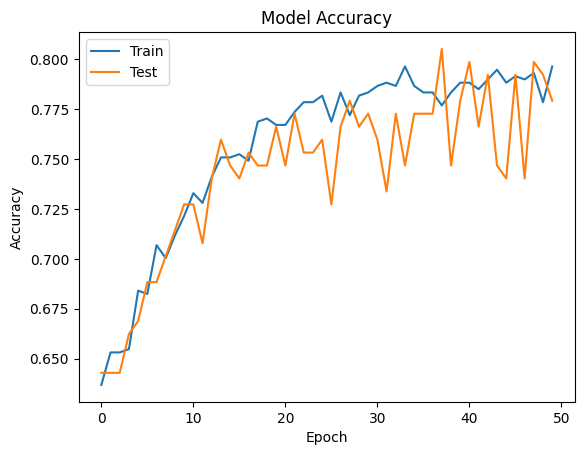

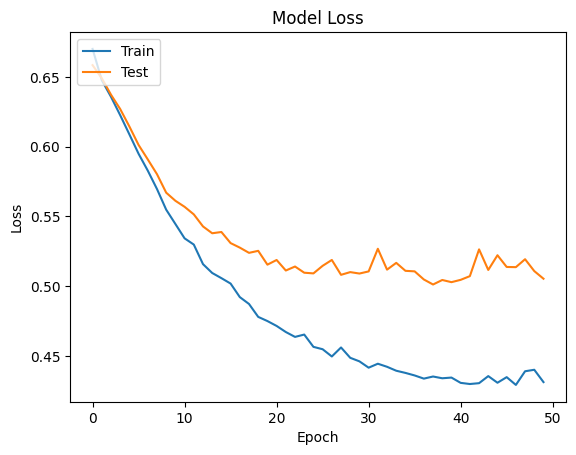

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()